In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import librosa
import json
import os
import IPython
%matplotlib inline
from tqdm.notebook import tqdm
import torchaudio
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [5]:
train_data = pd.read_csv("/home/lustbeast/AudioClass/Dataset/rfcx-species-audio-detection/train_tp.csv")
print(f"Train Shape: {train_data.shape}")
print(f"Columns: {train_data.columns}")
print(f"Number of Species in this dataset: {train_data.species_id.nunique()}")
print(f"Number of SongTypes: {train_data.songtype_id.nunique()}")

Train Shape: (1216, 7)
Columns: Index(['recording_id', 'species_id', 'songtype_id', 't_min', 'f_min', 't_max',
       'f_max'],
      dtype='object')
Number of Species in this dataset: 24
Number of SongTypes: 2


### Features:
    1. T_MIN - The starting time of a species sound in an audio file.
    2. T_MAX - The ending time of a species sound in an audio file.
    3. F_MIN - The minimum frequency of the species.
    4. F_MAX -  The maximum frequency of the species.

## Null Values

In [6]:
train_data.isna().sum()

recording_id    0
species_id      0
songtype_id     0
t_min           0
f_min           0
t_max           0
f_max           0
dtype: int64

* There are no null values present in training data.

## EDA

In [7]:
def plot_count(feature,desc,df):
    fig,ax = plt.subplots(1,1,figsize=(20,5))
    total = len(df)
    img = sns.countplot(df[feature],order = df[feature].value_counts().index[:30])
    img.set_title(desc)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:1.2f}%'.format(100*height/total),
            ha='center'
        )

1216

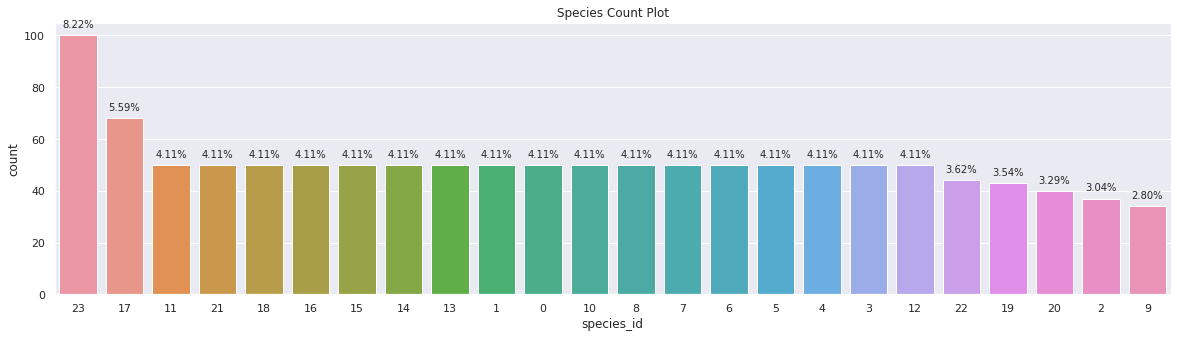

In [8]:
plot_count(feature='species_id',desc='Species Count Plot',df=train_data)

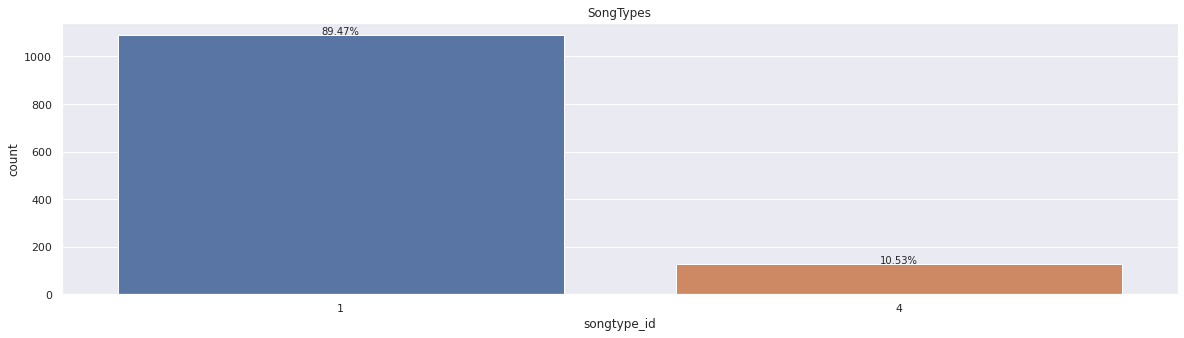

In [9]:
plot_count(feature='songtype_id',desc='SongTypes',df=train_data)

In [10]:
def plot_feature_distribution(data_df, feature, feature2, title, kde_mode=False, hist_mode=True):
    f, ax = plt.subplots(1,1, figsize=(12,6))
    for item in list(data_df[feature2].unique()):
        d_df = data_df.loc[data_df[feature2]==item]
        try:
            sns.distplot(d_df[feature], kde=kde_mode, hist=hist_mode, label=item)
        except:
            pass
    plt.legend(labels=list(data_df[feature2].unique()), bbox_to_anchor=(1, 1), loc='upper right', ncol=2)
    plt.title(title)
    plt.show()

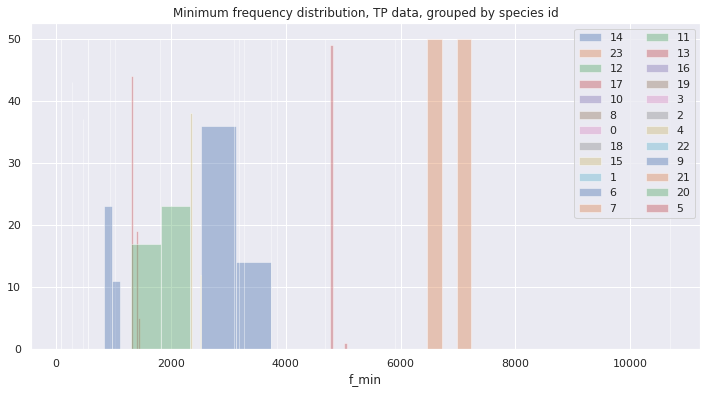

In [11]:
plot_feature_distribution(train_data, 'f_min', 'species_id', "Minimum frequency distribution, TP data, grouped by species id")

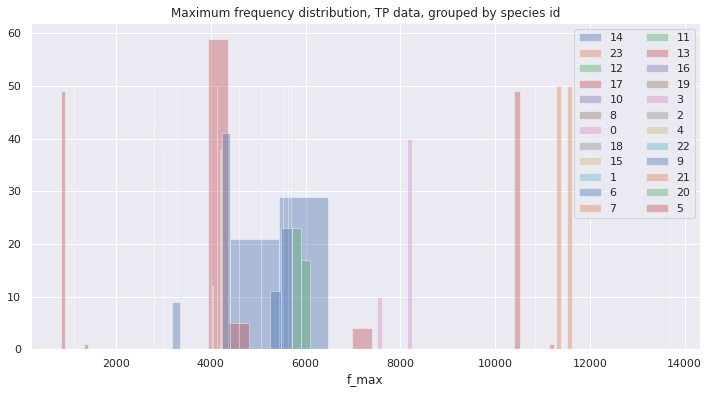

In [12]:
plot_feature_distribution(train_data, 'f_max', 'species_id', "Maximum frequency distribution, TP data, grouped by species id")

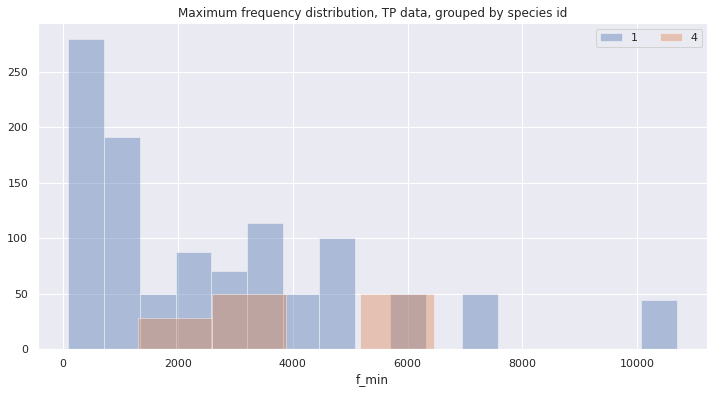

In [13]:
plot_feature_distribution(train_data, 'f_min', 'songtype_id', "Maximum frequency distribution, TP data, grouped by species id")

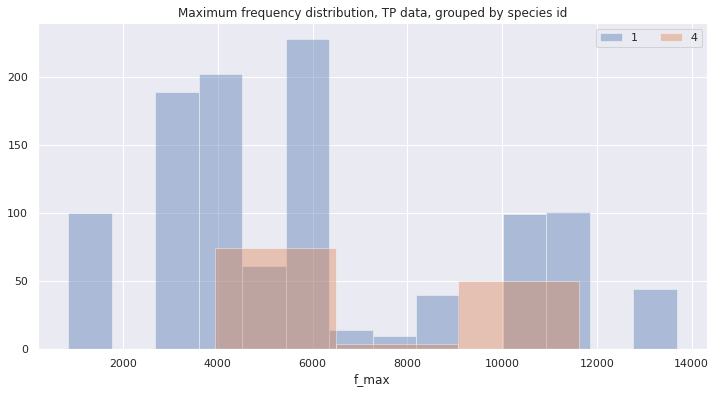

In [14]:
plot_feature_distribution(train_data, 'f_max', 'songtype_id', "Maximum frequency distribution, TP data, grouped by species id")

## Grouping the Dataset based on record_id 

In [6]:
files = train_data.recording_id.unique().tolist()
tr_gr = train_data.groupby(['recording_id'])

In [7]:
#Label Generation
bird_dict={}
for f in files:
    lbls = np.zeros(24)
    temp = tr_gr.get_group(f)
    sps = temp.species_id.unique()
    for i in sps:
        lbls[i] = 1
    bird_dict[f] = lbls

In [8]:
len(bird_dict)

1132